## Home Regression

* Student name: **Daniel M. Smith**
* Student pace: **Full Time**
* Scheduled project review date/time: 
* Instructor name: **Abhineet Kulkarni**
* Blog post URL:


In [6]:
# Your code here - remember to use markdown cells for comments as well!

In [7]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data/kc_house_data.csv')

**Columns**<br>
id - unique identified for a house<br>
date - house was sold<br>
price - is prediction target<br>
bedrooms- of Bedrooms/House<br>
bathrooms- of bathrooms/bedrooms<br>
sqft_living - footage of the home<br>
sqft_lot - footage of the lot<br>
floors - Total floors (levels) in house<br>
waterfront - House which has a view to a waterfront<br>
view - Has been viewed<br>
condition - How good the condition is ( Overall )<br>
grade - overall grade given to the housing unit, based on King County grading system<br>
sqft_above - square footage of house apart from basement<br>
sqft_basement - square footage of the basement<br>
yr_built - Built Year<br>
yr_renovated - Year when house was renovated<br>
zipcode - zip<br>
lat - Latitude coordinate<br>
long - Longitude coordinate<br>
sqft_living15 - The avg square footage of interior housing living space for the nearest 15 neighbors<br>
sqft_lot15 - The avg square footage of the land lots of the nearest 15 neighbors<br>


In [8]:
data.shape

(21597, 21)

In [9]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [11]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [12]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [13]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

11% of waterfront is NaN
18% of yr_renovated is NaN
.2% of view is NaN
We will set Nan to 0.0 for Nans

**Handling Nan Values**

In [14]:
data['waterfront'] = data['waterfront'].fillna(0.0)

In [15]:
data['yr_renovated'] = data['yr_renovated'].fillna(0.0)

In [16]:
data['view'] = data['view'].fillna(0.0)

**Rename date column to date last sold**

In [17]:
data = data.rename(columns = {"date":"lastSoldDate"})

In [18]:
#Covers 70 zipcodes
data.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [19]:
#sqft_basement should be converted to a float64 not an object
#also has ? which should be set to 0.0


In [20]:
#replacing '?'
data['sqft_basement'] = [0.0 if value == '?' else value for value in data['sqft_basement']]

In [21]:
data.loc[data["sqft_basement"] == '?']

,id,lastSoldDate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [22]:
data["sqft_basement"] = pd.to_numeric(data["sqft_basement"])

Price column seems to be the price since last sold. This could be an oout of date column if it has been a long while since last sole.  We should make a 2 features, 1. age of home and 2. how many years since last sold.


In [23]:
Sqft_living15 seems to be an average of the 15 properties around
sqft_lot15 seems to be average of 15 lots around

SyntaxError: invalid syntax (<ipython-input-23-70926093693e>, line 1)

In [ ]:
data.tail(5)

In [ ]:
data.describe()

The data is about houses in zipcodes around Seattle, WA.  
The dependent or response variable is Price and min value is 78000 and max is 7,700,000 and a mean of 540296 and median of 450000. <br>
sq_ft living ranges from 370 to 13540 sf ft.  <br>
bedrooms range from 1 to 33 with a mean of 3.37 and median of 3. <br>
sqft_lot range from 520 to 1651359.0 with mean of 15099 and median of 7618.<br>

**categorical data**<br>
zipcode-70 zipcodes<br>
grade-grade from kings county grading system 3-13<br>
condition-1 to 5 5 is best<br>
view- has been viewed 0-4<br>
waterfront- view of waterfront 0-1 being yes<br>


In [ ]:
data['yr_renovated'].value_counts()

In [ ]:
data['view'].value_counts()

In [ ]:
data['waterfront'].value_counts()

In [ ]:
data.loc[data['sqft_living'] != (data['sqft_above'] + data['sqft_basement'])]

In [ ]:
data['age'] = 2021 - data['yr_built']

In [ ]:
data['age']

In [ ]:
data.head(10)

In [ ]:
data['yrsince_reno'] = data['age']

In [ ]:
data['yrsince_reno'] = [(2021 - val)  if (val !=0.0) else None for val in data['yr_renovated'] ]
#expression1 if condition else expression2 for item in iterable
data['yrsince_reno'] = data['yrsince_reno'].fillna(data['age'])

In [ ]:
data.head(10)

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.columns

In [ ]:
#rearrange Columns
data = data[['id', 'lastSoldDate', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'yr_built','age','condition', 'grade', 'waterfront',
        'yr_renovated','yrsince_reno', 'sqft_above', 'sqft_basement',  'view',  'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15' ]]

In [ ]:
data.info()

In [ ]:
data

In [ ]:
data.to_csv('./data/kc_house_data_tidy.csv',encoding='utf-8')

---
---
---

In [ ]:
#EDA of data

In [26]:
hddf = pd.read_csv('./data/kc_house_data_tidy.csv')

In [27]:
hddf.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
hddf


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns


In [29]:
#define feature pertinent to model
feats_df = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'age','condition', 'grade']

In [ ]:
hddf.hist(figsize = (20,18));

Price looks to be right skewed.  We will look for linearity between different pairs of data.
## Check for Linearity

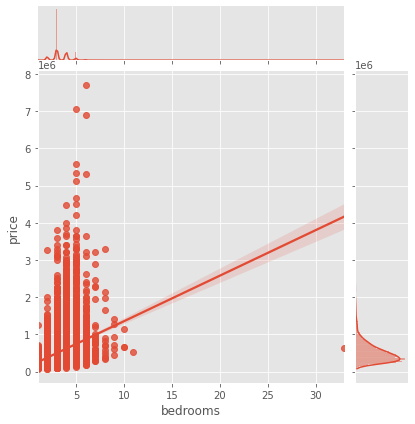

In [35]:
sns.jointplot(x='bedrooms',y='price', data=hddf, kind='reg');

In [ ]:
Observation: A Big outlier of 30+ bedrooms. Note: we should remove the outlier. 

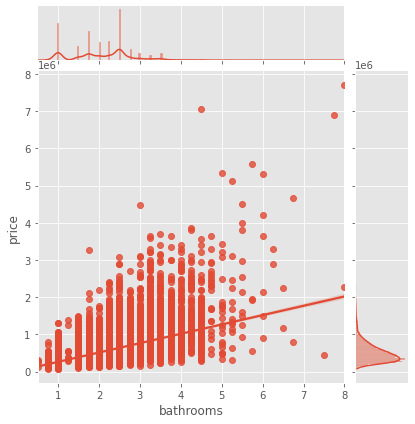

In [34]:
sns.jointplot(x='bathrooms',y='price', data=hddf, kind='reg');

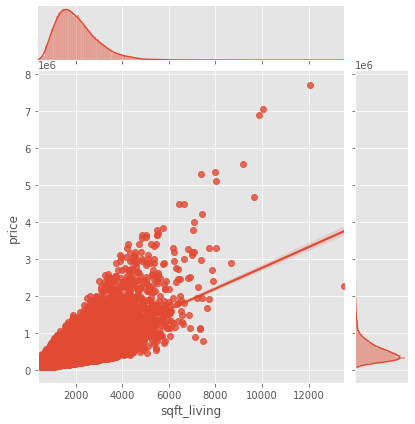

In [36]:
sns.jointplot(x='sqft_living',y='price', data=hddf, kind='reg');

Is linear? not truly but somewhat

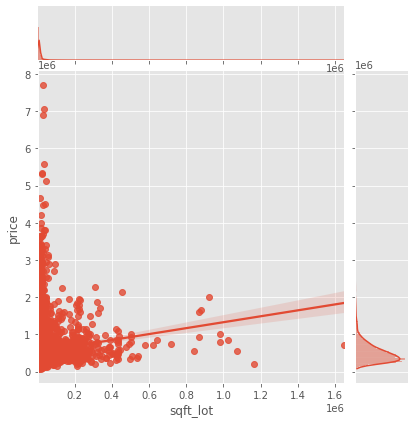

In [33]:
sns.jointplot(x='sqft_lot',y='price', data=hddf, kind='reg');

not linear

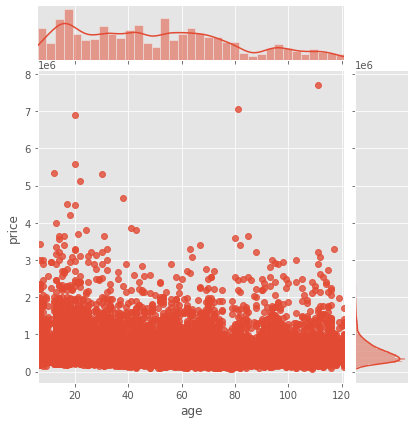

In [32]:
sns.jointplot(x='age',y='price', data=hddf, kind='reg');

In [ ]:
not linear

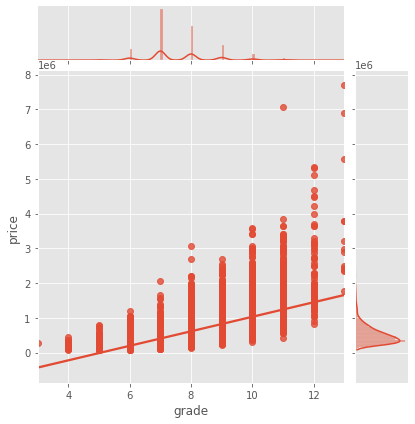

In [37]:
sns.jointplot(x='grade',y='price', data=hddf, kind='reg');

In [ ]:
sns.jointplot(x='age',y='price', data=hddf, kind='reg');

## Check for multicolinearity in features

In [30]:
corr = hddf[feats_df].corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,condition,grade
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.155670,0.026496,0.356563
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,-0.507173,-0.126479,0.665838
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,-0.318152,-0.059445,0.762779
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.052946,-0.008830,0.114731
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.489193,-0.264075,0.458794
age,-0.155670,-0.507173,-0.318152,-0.052946,-0.489193,1.000000,0.361592,-0.447865
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.361592,1.000000,-0.146896
grade,0.356563,0.665838,0.762779,0.114731,0.458794,-0.447865,-0.146896,1.000000


In [ ]:
#looking for pairwise correlations over .65 is a sign of multicolinearity

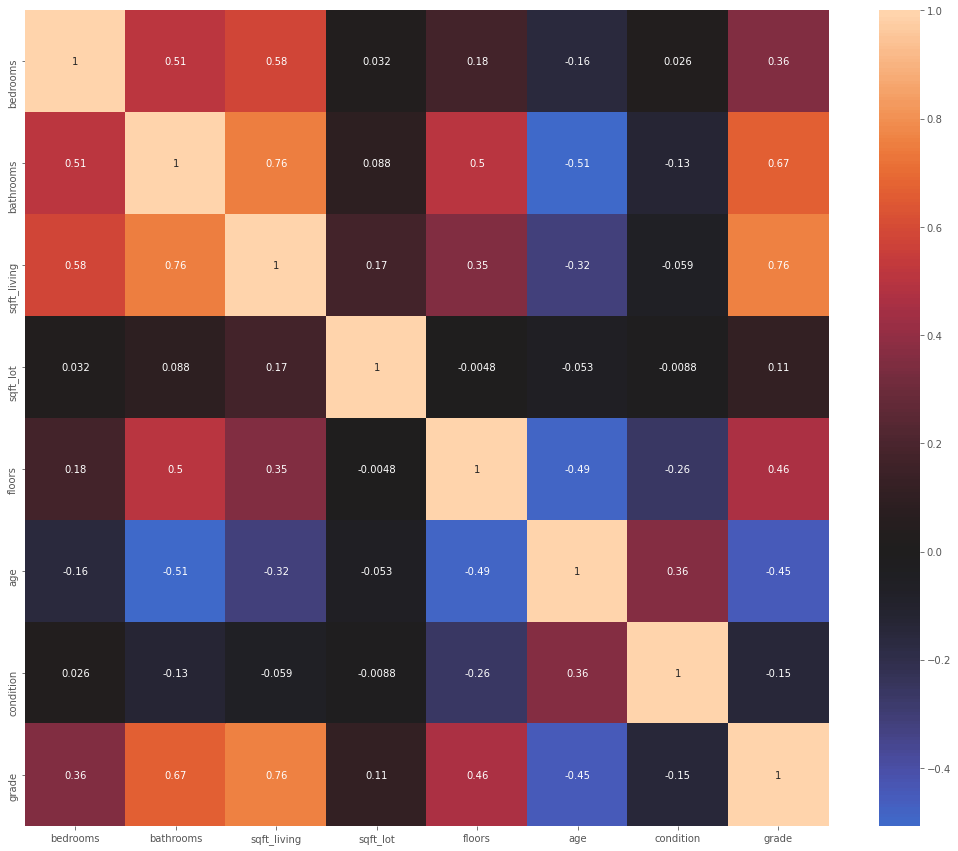

In [31]:
plt.figure(figsize=(18,15))
sns.heatmap(corr, center=0, annot=True);